# Import used modules

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../src')
import benchmark_utils as bu
import analysis_utils as au

# Run Alignments for OpenCADD.superposition for the CMGC Structures

Perform all pairwise alignments for the given sample structures. Every method performs 1225 alignments for the 50 CMGC structures. The benchmark is done with an Intel Core i5-1038NG7 CPU and 16 GB of RAM.

In [2]:
# richtiger path
#bu.run_alignments(sample1_path="/Users/julian/PythonProjects/Bachelor/benchmark/TK_samples.txt",
#                  output_path="")

# Create a Dataframe containing the Alignments of all five Methods

The alignments for PyMol and ChimeraX MatchMaker are done in the respectively programs and are saved in seperate files. For the analysis, the DataFrames are combined.

In [3]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
superposer_CMGC_DFGin = pd.read_csv("../data/OpenCADD_results/20211110_superposer_benchmark_CMGC_DFGin_rerun.csv", names=columns)
pymol_CMGC_DFGin = pd.read_csv("../data/PyMol_results/20211113_pymol_benchmark_CMGC_DFGin.csv", names=columns)
chimerax_CMGC_DFGin = pd.read_csv("../data/ChimeraX_results/20211113_mmaker_benchmark_CMGC_DFGin.csv", names=columns)
all_CMGC_DFGin = pd.concat([superposer_CMGC_DFGin, pymol_CMGC_DFGin, chimerax_CMGC_DFGin]).reset_index(drop=True)

# Analysis

## General Checks

In [4]:
counts, nans, times = au.general_checks(all_CMGC_DFGin)

Check if every value is present.
It should be 1225 for every value, because there are 1225 alignments performed per method.

In [5]:
counts

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain
method,,,,,,,,,,,,,,,,,,
matchmaker,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
mda,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
mmligner,1225,1225,1176,1176,1176,1176,1176,1176,1176,1176,1225,1225,1225,1225,1225,1225,1225,1225
pymol,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
theseus,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225


Next, we check for missing alignments. Some Methods have problems with some structures. 

In this case, MMLigner had problems with one structure, resulting in errors for every alignment with this structure.
The structure was 4fv3 from ERK2.
The entries with 4fv3 from MMLigner are removed for further analysis.
All other methods had no missing alignments.

In [6]:
nans

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain
method,,,,,,,,,,,,,,,,,,
mmligner,49,49,0,0,0,0,0,0,0,0,49,49,49,49,49,49,49,49


In [7]:
all_CMGC_DFGin[all_CMGC_DFGin["rmsd"].isna()]

,reference_id,mobile_id,method,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain
1262,3rk9,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDK2,CMGC,Human,A,Erk2,CMGC,Human,A
1310,2vx3,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DYRK1A,CMGC,Human,A,Erk2,CMGC,Human,A
1357,1w98,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDK2,CMGC,Human,A,Erk2,CMGC,Human,A
1403,1pw2,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDK2,CMGC,Human,A,Erk2,CMGC,Human,A
1448,3sd0,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GSK3B,CMGC,Human,A,Erk2,CMGC,Human,A
1492,3rni,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDK2,CMGC,Human,A,Erk2,CMGC,Human,A
1535,6hk7,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GSK3B,CMGC,Human,A,Erk2,CMGC,Human,A
1577,4cxa,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRK7,CMGC,Human,A,Erk2,CMGC,Human,A
1618,6ges,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erk1,CMGC,Human,A,Erk2,CMGC,Human,A
1658,4qte,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erk2,CMGC,Human,A,Erk2,CMGC,Human,A


In [8]:
all_CMGC_DFGin = all_CMGC_DFGin.dropna()

During the computation of the alignments, the time is measured.  For all OpenCADD methods combined the CPU-time is just under 6.5 hours. The time for downloading the structures is not included.

In [9]:
times

method
matchmaker     12.494347
mda             5.749700
mmligner      309.319882
pymol           0.569850
theseus         6.196885
Name: time, dtype: float64

### Compute the relative Coverage

The relative coverage is computed the following way:

coverage / min(lenght of structure 1, lenght of structure 2)

In [10]:
au.compute_rel_cov(all_CMGC_DFGin)

## Create basic plots

It is easy to see in both plots, that MMLigner performs the best. Besides that, Theseus performs very similar to ChimeraX MatchMaker and PyMol align.

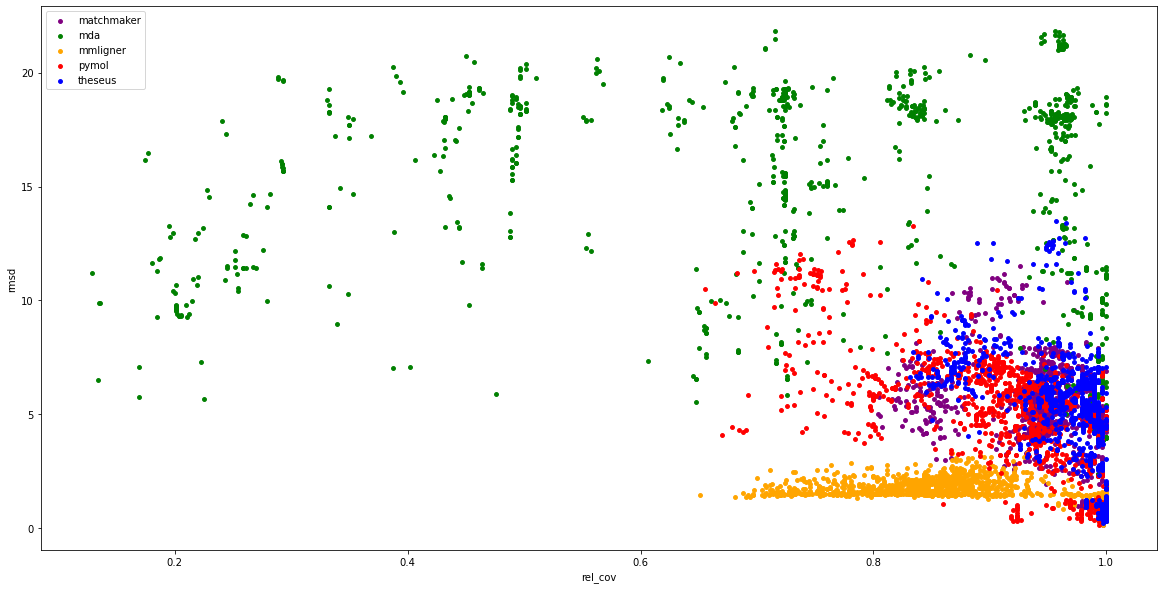

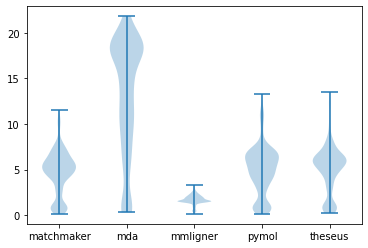

In [11]:
au.create_scatter_plot(all_CMGC_DFGin)
au.create_violine_plot(all_CMGC_DFGin)

## Check if data is normally distributed

In [12]:
#p-value < 0.5 --> not norm

Both, the Shapiro-Wilk-Test and the Kolmogorov-Smirnow-Test show, that the values for RMSD, SI, MI, SAS and relative coverage are not normally distributed. But Theseus has a very similar distribution for the measures except the relative coverage. MMLigner performs the best for all measures except the relative coverage. MDA performs the worst for all measures.

/Users/julian/opt/anaconda3/envs/opencadd/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8410655856132507, pvalue=0.0)
ShapiroResult(statistic=0.6589630842208862, pvalue=0.0)
ShapiroResult(statistic=0.8908839225769043, pvalue=0.0)
ShapiroResult(statistic=0.663053035736084, pvalue=0.0)
KstestResult(statistic=0.7641784097972133, pvalue=0.0)
KstestResult(statistic=0.7802463089725846, pvalue=0.0)
KstestResult(statistic=0.5745625906986256, pvalue=0.0)
KstestResult(statistic=0.5458583398898053, pvalue=0.0)


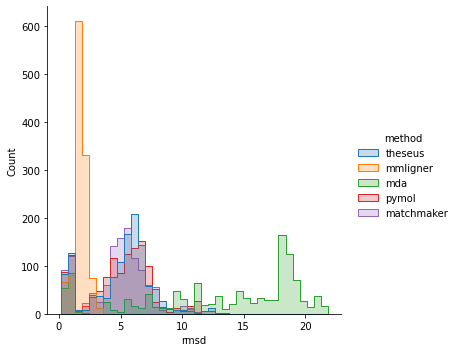

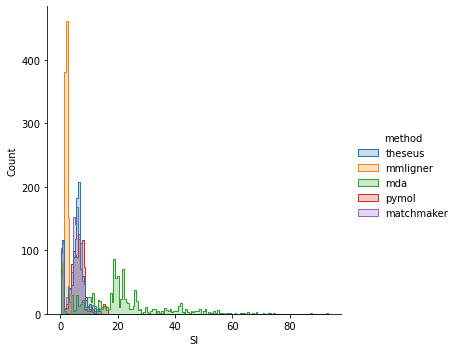

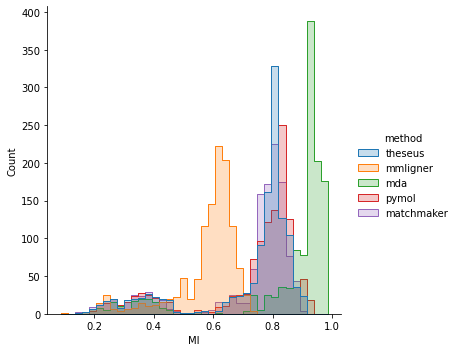

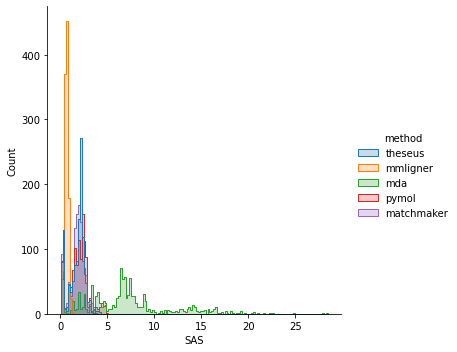

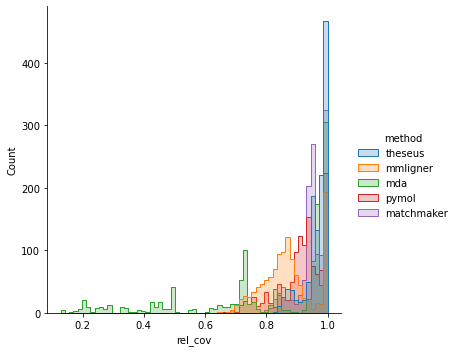

In [13]:
dist_tests = au.check_distribution(all_CMGC_DFGin)

## Compute Correlation

Since the data is not distributed normally, the spearman correlation is used.

The three quality measures correlate very well with each other and with the rmsd. The quality measures also negatively correlate with the relative coverage, which means, the lower the relative coverage, the higher the quality measures. 

The time also negatively correlates with the quality measures, which means taking more time for an alignment produces better results. This correlation in this case is highly biased by MMLigner. It takes much more time than the other methods, but also yield overall the best results.

All three quality measures share the property, that lower values mean better alignments.

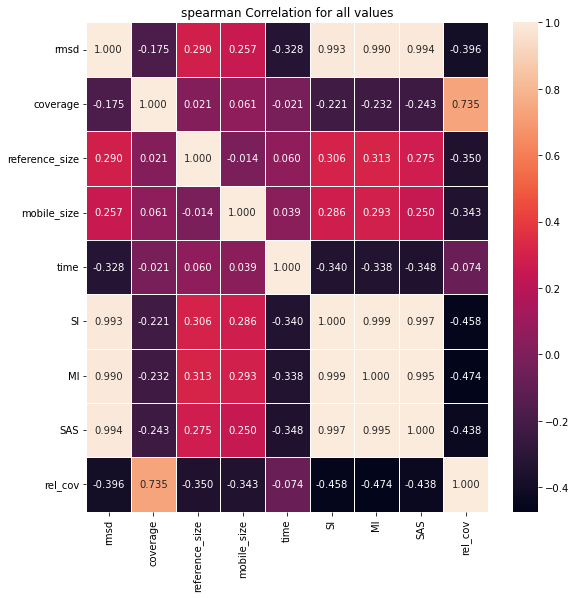

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
rmsd,1.000000,-0.175341,0.290275,0.257169,-0.328103,0.993042,0.990095,0.993819,-0.395891
coverage,-0.175341,1.000000,0.020567,0.061421,-0.021127,-0.221111,-0.231570,-0.242986,0.735204
reference_size,0.290275,0.020567,1.000000,-0.014304,0.059720,0.306451,0.312726,0.275347,-0.349520
mobile_size,0.257169,0.061421,-0.014304,1.000000,0.038590,0.285592,0.292738,0.250149,-0.343086
time,-0.328103,-0.021127,0.059720,0.038590,1.000000,-0.340295,-0.337554,-0.348461,-0.073896
SI,0.993042,-0.221111,0.306451,0.285592,-0.340295,1.000000,0.999409,0.996544,-0.458275
MI,0.990095,-0.231570,0.312726,0.292738,-0.337554,0.999409,1.000000,0.994861,-0.473569
SAS,0.993819,-0.242986,0.275347,0.250149,-0.348461,0.996544,0.994861,1.000000,-0.438283
rel_cov,-0.395891,0.735204,-0.349520,-0.343086,-0.073896,-0.458275,-0.473569,-0.438283,1.000000


In [14]:
corr = au.compute_correlation(all_CMGC_DFGin, coeff="spearman")
corr

In [15]:
# nullhypo = alle gleich
#p vlaue < 0.05 --> statisch signifikant

## Check for significant differences

Because the data is not normally distributed, an ANOVA is not suitable. Therefore the Kruskal-Wallis-Test is performed. The RMSD and the three quality measures are significantly different for the groups.

In [16]:
kruskal = au.compute_kruskal(all_CMGC_DFGin)

Kruskal Wallis results for RMSD:
KruskalResult(statistic=2318.7999644490446, pvalue=0.0)


Kruskal Wallis results for Similarity Index (SI):
KruskalResult(statistic=2282.3680342051393, pvalue=0.0)


Kruskal Wallis results for Match Index (MI):
KruskalResult(statistic=2244.9678072567785, pvalue=0.0)


Kruskal Wallis results for Structural Alignment Score (SAS):
KruskalResult(statistic=2300.9504472300173, pvalue=0.0)


# Which group different

As also visible in the diagrams above, PyMol align and Theseus scores very similarely in all considered measures. ChimeraX MatchMaker is also the most similar of the remaining methods to PyMol align and Theseus but is still significantly different.

In [17]:
significant, non_significant = au.compute_mannwhitneyu(all_CMGC_DFGin)

All significant results:
Result for rmsd with theseus and mmaker:
MannwhitneyuResult(statistic=836301.0, pvalue=9.034791926514629e-07)
Result for rmsd with theseus and mmligner:
MannwhitneyuResult(statistic=1202765.0, pvalue=1.4476027778415248e-177)
Result for rmsd with theseus and mda:
MannwhitneyuResult(statistic=235637.0, pvalue=5.845937256989749e-190)
Result for rmsd with pymol and mmaker:
MannwhitneyuResult(statistic=794643.5, pvalue=0.011337284086859228)
Result for rmsd with pymol and mmligner:
MannwhitneyuResult(statistic=1199402.0, pvalue=3.970338402102178e-175)
Result for rmsd with pymol and mda:
MannwhitneyuResult(statistic=232662.0, pvalue=3.877335752862705e-192)
Result for rmsd with mmaker and mmligner:
MannwhitneyuResult(statistic=1195935.0, pvalue=1.2432914200648697e-172)
Result for rmsd with mmaker and mda:
MannwhitneyuResult(statistic=220400.0, pvalue=3.0058203111310022e-201)
Result for rmsd with mmligner and mda:
MannwhitneyuResult(statistic=155470.0, pvalue=1.36332046

# Count the best alignments

For every pair of structures, the method that has the best quality measure is selected. The following statistics show how often a method had the best results for the quality measures.

In this case, some alignments had the same score, which also was the best. This results in a sum of over 1225 best alignments.

In [18]:
best_results = au.count_best_results(all_CMGC_DFGin)

Counts of best values for the Similarity Index (SI):
mmligner      1020
matchmaker     134
pymol           59
mda             30
theseus          3
Name: method, dtype: int64


Counts of best values for the Match Index (MI):
mmligner      1009
matchmaker     127
pymol           55
mda             30
theseus          4
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS):
mmligner      1013
matchmaker     128
pymol           56
mda             27
theseus          2
Name: method, dtype: int64


Counts of best values for the Similarity Index (SI) without MMLigner:
matchmaker    687
pymol         335
theseus       168
mda            36
Name: method, dtype: int64


Counts of best values for the Match Index (MI) without MMLigner:
matchmaker    685
pymol         316
theseus       186
mda            38
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS) without MMLigner:
matchmaker    693
pymol         333
theseus  